In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path

from IPython.display import display, HTML

import warnings
warnings.filterwarnings("ignore")

In [2]:
processed_path = '../processed-v2'

def get_processed_path(file, processed_path=processed_path):
    return os.path.join(processed_path, file)

def read_patient_data(apache, pid, norm=True, processed_path=processed_path):
    if norm:
        file_path = get_processed_path(
            os.path.join('data_per_patient_resample2min_normalized', 
                         apache.replace(' ', ''), 
                         f'{pid}.csv')
        )
    else:
        file_path = get_processed_path(
            os.path.join('data_per_patient_resample2min', 
                         apache.replace(' ', ''), 
                         f'{pid}.csv')
        )
        
    return pd.read_csv(file_path, header=[0,1], index_col=[0])

In [3]:
selected_pharma_file = os.path.join(processed_path, 'selected_pharma.p')
selected_physio_file = os.path.join(processed_path, 'selected_physio.csv')
selected_pharma = pickle.load(open(selected_pharma_file, 'rb'))
selected_physio = pd.read_csv(selected_physio_file)

In [4]:
pid = pickle.load(open(os.path.join(processed_path, 'pid_with_selected_pharma.p'), 'rb'))
pid_group = pickle.load(open(os.path.join(processed_path, 'pid_group_valid.p'), 'rb'))
patient_info = pickle.load(open(os.path.join(processed_path, 'patient_info_valid.p'), 'rb'))

In [5]:
count_apache_group = {}
for apache in pid_group:
    count_apache_group[apache] = len(pid_group[apache])

count_apache_group = {k:v for k, v in sorted(count_apache_group.items(), key=lambda item: item[1], reverse=True)}
for apache in count_apache_group:
    print(f'{apache:<30}: {len(pid_group[apache])}')

Surgical Cardiovascular       : 7963
Neurological                  : 4863
Cardiovascular                : 3631
Surgical Neurological         : 2194
Pulmonary                     : 2104
Surgical Gastrointestinal     : 1704
Gastrointestinal              : 1483
Trauma                        : 1169
Surgical Respiratory          : 608
Metabolic/Endocrinology       : 572
Sepsis                        : 525
Other                         : 524
Surgical others               : 267
Surgical Trauma               : 181
Surgical Orthopedics          : 156
Urogenital                    : 85
Hematology                    : 81
Surgical Urogenital           : 75
Surgical Gynecology           : 73
Intoxication                  : 55


# Pharma usage - Cardiovascular

In [6]:
apache = 'Cardiovascular'
pid_cv = sorted(pid_group[apache])

save_path = os.path.join(processed_path, f'pharma_count_per_apache/')

# df_pharma_count_normed = pd.DataFrame(columns=sorted(selected_pharma['variableid'].unique()), index=pid_cv)

# for pid in tqdm(pid_cv):
#     data = read_patient_data(apache=apache, pid=pid, norm=True)
#     pharma = data.loc[:, ('pharma', slice(None))]
#     df_pharma_count_normed.loc[pid] = pharma.astype(bool).sum().values
    
# df_pharma_count_normed.to_csv(os.path.join(save_path, f'pharma_occurence_{apache.replace(" ", "")}.csv'))

df_pharma_count_normed = pd.read_csv(
    os.path.join(
        save_path, 
        f'pharma_occurence_{apache.replace(" ", "")}.csv'
    ), 
    index_col=[0])

In [7]:
patient_info.loc[(patient_info['patientid'].isin(pid_cv)) & (patient_info['discharge_status']=='dead')].shape, len(pid_cv)

((611, 7), 3631)

In [8]:
pharma_count = df_pharma_count_normed.sum()
pharma_occur = pharma_count[pharma_count>400].sort_values(ascending=False)

pharma_count_per_patient = df_pharma_count_normed.astype(bool).sum()
pharma_occur_per_patient = pharma_count_per_patient[pharma_count_per_patient>400].sort_values(ascending=False)

for variableid in pharma_occur_per_patient.index:
    variablename = selected_pharma.loc[selected_pharma['variableid']==int(variableid), ['variablename']]
    num_occr = pharma_occur.loc[variableid]
    num_patient = pharma_occur_per_patient.loc[variableid]
    print(f'{variableid:<10} - {variablename.iloc[0].item():<50} - Pat. Occur: {num_patient:<6} - Occur: {num_occr:<8}')

107        - Liquemin 5000 U/ml                                 - Pat. Occur: 2731   - Occur: 532145  
1000251    - Fentanyl inj 50 µg/ml                              - Pat. Occur: 2635   - Occur: 47029   
208        - Disoprivan 2%                                      - Pat. Occur: 1905   - Occur: 257641  
1000747    - Lasix Bolus 20mg  Amp.                             - Pat. Occur: 1495   - Occur: 8474    
251        - Dormicum inj 1 mg/ml                               - Pat. Occur: 1460   - Occur: 21841   
1000293    - Lopirin Tabl 12.5 mg                               - Pat. Occur: 1386   - Occur: 5630    
1000396    - Kalium Chlorid 15% 10 ml                           - Pat. Occur: 1380   - Occur: 35664   
1000699    - Disoprivan 2% BOLUS                                - Pat. Occur: 1369   - Occur: 16327   
426        - Dobutrex 250 mg/20ml                               - Pat. Occur: 1234   - Occur: 142998  
1000252    - Sodium nitro                                       - Pat. Oc

# Pharma usage - Surgical Cardiovascular

In [9]:
apache = 'Surgical Cardiovascular'
pid_sc = sorted(pid_group[apache])

save_path = os.path.join(processed_path, f'pharma_count_per_apache/')

# df_pharma_count_normed = pd.DataFrame(columns=sorted(selected_pharma['variableid'].unique()), index=pid_sc)

# for pid in tqdm(pid_sc):
#     data = read_patient_data(apache=apache, pid=pid, norm=True)
#     pharma = data.loc[:, ('pharma', slice(None))]
#     df_pharma_count_normed.loc[pid] = pharma.astype(bool).sum().values
    
# df_pharma_count_normed.to_csv(os.path.join(save_path, f'pharma_occurence_{apache.replace(" ", "")}.csv'))

df_pharma_count_normed = pd.read_csv(
    os.path.join(
        save_path, 
        f'pharma_occurence_{apache.replace(" ", "")}.csv'
    ), 
    index_col=[0])

In [10]:
patient_info.loc[(patient_info['patientid'].isin(pid_sc)) & (patient_info['discharge_status']=='dead')].shape, len(pid_sc)

((90, 7), 7963)

In [11]:
pharma_count = df_pharma_count_normed.sum()
pharma_occur = pharma_count[pharma_count>1000].sort_values(ascending=False)

pharma_count_per_patient = df_pharma_count_normed.astype(bool).sum()
pharma_occur_per_patient = pharma_count_per_patient[pharma_count_per_patient>1000].sort_values(ascending=False)

for variableid in pharma_occur_per_patient.index:
    variablename = selected_pharma.loc[selected_pharma['variableid']==int(variableid), ['variablename']]
    num_occr = pharma_occur.loc[variableid]
    num_patient = pharma_occur_per_patient.loc[variableid]
    print(f'{variableid:<10} - {variablename.iloc[0].item():<50} - Pat. Occur: {num_patient:<6} - Occur: {num_occr:<8}')

1000251    - Fentanyl inj 50 µg/ml                              - Pat. Occur: 7850   - Occur: 122550  
208        - Disoprivan 2%                                      - Pat. Occur: 7430   - Occur: 473030  
1000305    - Zinacef Amp 1.5 g                                  - Pat. Occur: 7022   - Occur: 19018   
225        - Benuron supp 1000 mg                               - Pat. Occur: 6491   - Occur: 10717   
107        - Liquemin 5000 U/ml                                 - Pat. Occur: 6266   - Occur: 538775  
1000699    - Disoprivan 2% BOLUS                                - Pat. Occur: 5568   - Occur: 32165   
1000256    - Aspirin Tbl 100 mg                                 - Pat. Occur: 5201   - Occur: 7223    
1000421    - Magnesium Sulfat 50% 10 ml                         - Pat. Occur: 4215   - Occur: 8565    
1000471    - Dafalgan Brausetbl 1g                              - Pat. Occur: 4070   - Occur: 13068   
1000605    - Novalgin inj lös 50% 2 ml                          - Pat. Oc

In [12]:
pharma_pid_dict = {}
for pharma in tqdm(df_pharma_count_normed.columns):
    pids = df_pharma_count_normed.index[df_pharma_count_normed[pharma].to_numpy().nonzero()].to_list()
    pharma_pid_dict[int(pharma)] = pids

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 531/531 [00:00<00:00, 12531.51it/s]


In [13]:
def get_vitals_individual(pharmaid, toi, pid, vitals=None, norm=True, apache='Surgical Cardiovascular'):
    if isinstance(toi, int):
        toi = [toi, toi]
    elif isinstance(toi, list):
        if len(toi) != 2:
            raise ValueError('Only integer or list of length 2 is accepted for toi.')
    else:
        raise ValueError('Only integer or list of length 2 is accepted for toi.')
        
    data = read_patient_data(apache=apache, pid=pid, norm=norm)
    data.index = pd.to_datetime(data.index)
    data.index.name = 'timestamp'
    pharma = data.loc[:, ('pharma', str(pharmaid))]
    ts_pharma = pharma.iloc[pharma.to_numpy().nonzero()].index
#     if len(ts_pharma) == 0:
#         print(f'Patient {pid} - No record for Pharma {pharmaid}.')
    
    for ts in ts_pharma:
        ts_start = ts - datetime.timedelta(minutes=60)
        ts_end = ts + datetime.timedelta(minutes=60)
        if (data.index[0] > ts_start) or (data.index[-1] < ts_end):
            continue
        
        data_ = data[(data.index >= ts_start) & (data.index <= ts_end)]
        data_ = pd.concat([data_], keys=[ts],  names=['ts_pharma'])
        data_ = pd.concat([data_], keys=[pid], names=['patientid'])
    
    if 'data_' not in locals():
#         print(data.index[0], data.index[-1], ts_pharma)
        return None
    
    if vitals:
        vitals = [str(v) for v in vitals]
        col0 = data_.columns.get_level_values(0)
        col1 = data_.columns.get_level_values(1)
        cond = ((col0=="physio_num") & (col1 in vitals)) | (col0=='physio_cat') | (col0=="pharma")
        data_ = data_.loc[:,cond]
        return data_
        
    return data_
        
    
    
def get_vitals(pharmaid:int, toi, pharma_pid_dict=pharma_pid_dict, vitals=None, norm=True, apache='Surgical Cardiovascular'):
    """ get patient physiological data before and after the use of medication
    pharmaid [int] - variable id of the one medicine
    toi [int/list] - time of interest in the unit of minute
        1. if toi is a list of two numbers [a, b]
           we return the physiological data within a min before the medicine and b min after the medicine  
        2. if toi is an integer a
           the time interval is [a, a]
    vitals [list] - uid of numeric physio data 
    """
    data = pd.DataFrame()
    for pid in tqdm(pharma_pid_dict[pharmaid]):
        data_ = get_vitals_individual(pharmaid, toi, pid, vitals, norm, apache)
        if data_ is not None:
            data = pd.concat([data, data_])
        
    return data

In [14]:
# ??????????????ts_pharma empty???????????????????????
# some outlier records are removed in the normed pharma


# 107        - Liquemin 5000 U/ml: blood thinner

pharmaid = 107
toi = [60, 60]
apache = 'Surgical Cardiovascular'

# df_107 = get_vitals(pharmaid, toi, apache=apache, norm=True)

# Path(os.path.join(processed_path,'sample_per_pharma')).mkdir(exist_ok=True, parents=True)
# df_107[df_107==-1] = np.nan
# pickle.dump(df_107, 
#             open(os.path.join(
#                 processed_path, 
#                 f'sample_per_pharma/pharma{pharmaid}_{toi[0]}_{toi[1]}_{apache.replace(" ","")}_normed.p'), 
#                  'wb'))

df_107 = pickle.load(open(os.path.join(
                processed_path, 
                f'sample_per_pharma/{apache.replace(" ", "")}/pharma{pharmaid}_{toi[0]}_{toi[1]}_{apache.replace(" ","")}_normed.p'), 
                 'rb')
                    )

In [15]:
df_107_physio = df_107.loc[:, ('physio_num', slice(None))]
df_107_pharma = df_107.loc[:, ('pharma', slice(None))]

num_patient = df_107.index.get_level_values(0).unique().shape[0]
missing_data_per_patient = df_107_physio.groupby('patientid').count().astype(bool).sum().sort_values(ascending=False).droplevel(0)

for i in range(len(missing_data_per_patient)):
    uid = int(missing_data_per_patient.index[i])
    vname = selected_physio.loc[selected_physio['uid']==uid, 'variablename'].iloc[0]
    print(f'{vname:>80} - {uid:>3}: {missing_data_per_patient.iloc[i] / num_patient}')

                                                                      Heart rate -  18: 0.999668270028197
                                                    Peripheral oxygen saturation -   1: 0.9988389450986896
                                                            Fluid balance intake -  45: 0.9958533753524631
                                            Invasive diastolic arterial pressure -  25: 0.9718029523967491
                                             Invasive systolic arterial pressure -  24: 0.9714712224249461
                                                 Invasive mean arterial pressure -  26: 0.9714712224249461
                                                         Central venous pressure -  34: 0.9696467075800299
                                                            Fluid balance output -  46: 0.9412837949908774
                                                                Respiratory rate -   2: 0.857190247138829
                                       

In [16]:
### it is exactly the same as missing_data_per_patient

# num_sample = df_107.index.get_level_values(1).unique().shape[0]
# missing_data_per_sample = df_107.groupby('ts_pharma').count().astype(bool).sum().sort_values(ascending=False).droplevel(0)

# for i in range(len(missing_data_per_sample)):
#     uid = int(missing_data_per_sample.index[i])
#     vname = selected_physio.loc[selected_physio['uid']==uid, 'variablename'].iloc[0]
#     print(f'{vname:>80} - {uid:>3}: {missing_data_per_sample.iloc[i] / num_sample}')

In [17]:
num_entries = df_107.shape[0]
missing_data= df_107_physio.fillna(0).astype(bool).sum().sort_values(ascending=False).droplevel(0)

for i in range(len(missing_data)):
    uid = int(missing_data.index[i])
    vname = selected_physio.loc[selected_physio['uid']==uid, 'variablename'].iloc[0]
    print(f'{vname:>80} - {uid:>3}: {missing_data.iloc[i] / num_entries}')

                                                                      Heart rate -  18: 0.7870511108875409
                                                    Peripheral oxygen saturation -   1: 0.7453238309917367
                                                         Central venous pressure -  34: 0.6531763144800132
                                             Invasive systolic arterial pressure -  24: 0.6413264848315111
                                                 Invasive mean arterial pressure -  26: 0.6408669572476201
                                            Invasive diastolic arterial pressure -  25: 0.6399859694536516
                                                            Fluid balance intake -  45: 0.3060317753807417
                                                                Respiratory rate -   2: 0.036006297431268
                                                            Fluid balance output -  46: 0.029333630621395497
                                    

In [18]:
uid_selected = []
uid_selected += missing_data_per_patient[missing_data_per_patient/num_patient > 0.1].index.tolist() \
             + missing_data[missing_data/num_entries > 0.01].index.tolist() \

uid_selected = list(set(uid_selected))
uid_selected = sorted(uid_selected, key=lambda x: missing_data_per_patient.loc[x], reverse=True)
for uid in uid_selected:
    vname = selected_physio.loc[selected_physio['uid']==int(uid), 'variablename'].iloc[0]
    print(f'{uid:>3} - {vname:>60} - {missing_data_per_patient.loc[uid] / num_patient:.2f} - {missing_data.loc[uid] / num_entries:.4f}')

 18 -                                                   Heart rate - 1.00 - 0.7871
  1 -                                 Peripheral oxygen saturation - 1.00 - 0.7453
 45 -                                         Fluid balance intake - 1.00 - 0.3060
 25 -                         Invasive diastolic arterial pressure - 0.97 - 0.6400
 26 -                              Invasive mean arterial pressure - 0.97 - 0.6409
 24 -                          Invasive systolic arterial pressure - 0.97 - 0.6413
 34 -                                      Central venous pressure - 0.97 - 0.6532
 46 -                                         Fluid balance output - 0.94 - 0.0293
  2 -                                             Respiratory rate - 0.86 - 0.0360
 42 -                            Richmond agitation-sedation scale - 0.82 - 0.0186
 43 -                                          Hourly urine volume - 0.58 - 0.0106
  4 -                       Oxygen administration by nasal cannula - 0.54 - 0.0115
 29 

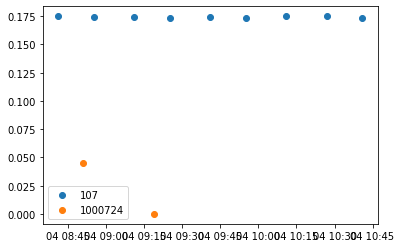

In [19]:
df_107_pharma[df_107_pharma==0] = np.nan
pids = df_107_pharma.index.get_level_values(0)

sample_pharma = df_107_pharma.query(f"patientid == {pids[0]}")
for col in sample_pharma.columns:
    x = sample_pharma.index.get_level_values(2)
    y = sample_pharma.loc[:, col].values
    if not (~pd.isnull(y)).sum():
        continue
    plt.scatter(x, y, label=col[1])
    
plt.legend()

# Plots

In [20]:
import matplotlib.dates as mdates
import datetime
xformatter = mdates.DateFormatter('%m/%d %H:%M')

def plot_patient_data(data:pd.DataFrame, pid:int, pharmaid:int, save_path=None):
    """
    data: index - timestamp
          column - different signal sources
    """
    df_physio = data.loc[:, ('physio_num', slice(None))]
    df_pharma = data.loc[:, ('pharma', slice(None))]

    pharma_name = selected_pharma.loc[selected_pharma['variableid']==pharmaid, 'variablename'].iloc[0]
    fig, ax = plt.subplots(1,1,figsize=(16,8))
    
    # plot timestamp of all medicines used in this periord 
    for _, ts in df_pharma[(df_pharma!=0).any(1)].index:
#         ts_loc = df_pharma.index.get_loc(ts)
#         print(ts)
        plt.axvline(x = ts, color = 'gray', linestyle='--')
    plt.axvline(x = df_pharma.index[len(df_pharma.index)//2][1], color = 'r', linestyle='--')
    
    # plot physio data
    for _, uid in df_physio.columns:
        label = selected_physio.loc[selected_physio['uid']==int(uid), 'variablename'].unique().item()
        values = df_physio[('physio_num', uid)]
        values.index = values.index.droplevel(0)

        if (~pd.isnull(values)).sum() > 0:
            if (~pd.isnull(values)).sum() == 1:
                ax.scatter(values.index, values.values, label=label);
            else:
                ax.plot(values, label=label);

    

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
    plt.xticks(rotation=30, ha='right')
    # ax.xaxis.set_major_locator(plt.MaxNLocator(9))
    ax.xaxis.set_major_formatter(xformatter)
    ax.set_title(f'Patient {pid} - Pharma {pharmaid}: {pharma_name}', fontsize=16)
    plt.tight_layout()
    
    pharmatime = values.index.get_level_values(0).unique()[0]
    pharmatime = datetime.datetime.strftime(pharmatime, '%d%m%y-%H%M')

    if save_path:
        plt.savefig(os.path.join(save_path, str(pid)+'-'+pharmatime+'.png'))
    plt.close()
    return 

  0%|▎                                                                                                | 23/6029 [00:08<39:05,  2.56it/s]


KeyboardInterrupt: 

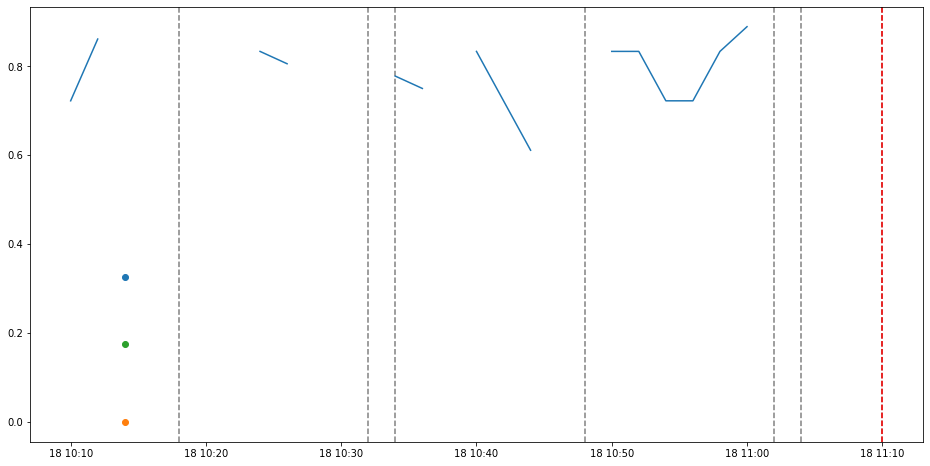

In [21]:
pharmaid = 107
save_path = f'../plots/pharma_response/{pharmaid}/'
Path(save_path).mkdir(parents=True, exist_ok=True)

pid_107 = df_107.index.get_level_values(0).unique()

for pid in tqdm(pid_107):
    data = df_107.loc[pid]
    plot_patient_data(data, pid, pharmaid, save_path);

In [22]:
sc = patient_info.loc[patient_info['APACHE']=='Surgical Cardiovascular']
sc[sc['discharge_status']=='dead'].shape

(90, 7)

In [ ]:
import pyts

def plot_dtw_aligned_data(df: pd.DataFrame, uid_selected=None, save_path=None):
    

In [23]:
uid = uid_selected[:7]
pid, ts_pharma = df_107_physio.index.droplevel(2).unique()[50]
data = df_107_physio.loc[(pid, ts_pharma, slice(None)), ('physio_num', uid)]
(~pd.isnull(data)).sum()/61

physio_num  18    0.573770
            1     0.622951
            45    0.278689
            25    0.508197
            26    0.524590
            24    0.524590
            34    0.557377
dtype: float64

<AxesSubplot:xlabel='patientid,ts_pharma,timestamp'>

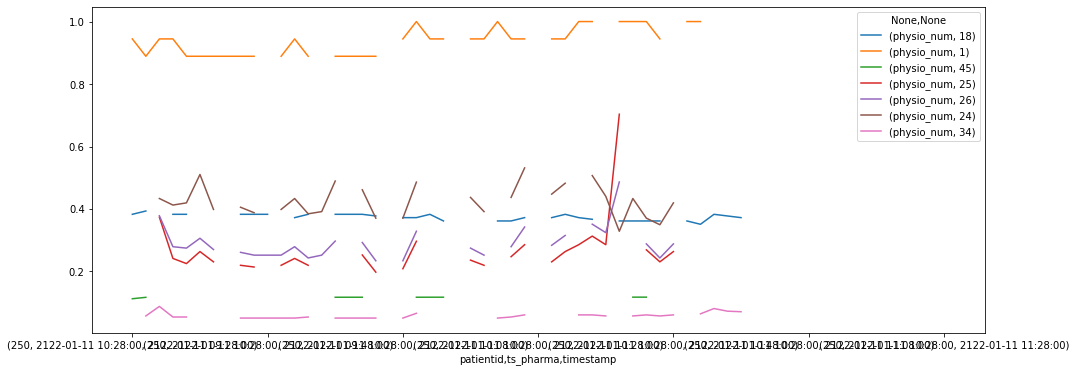

In [24]:
data.plot(figsize=(16,6))

<AxesSubplot:xlabel='patientid,ts_pharma,timestamp'>

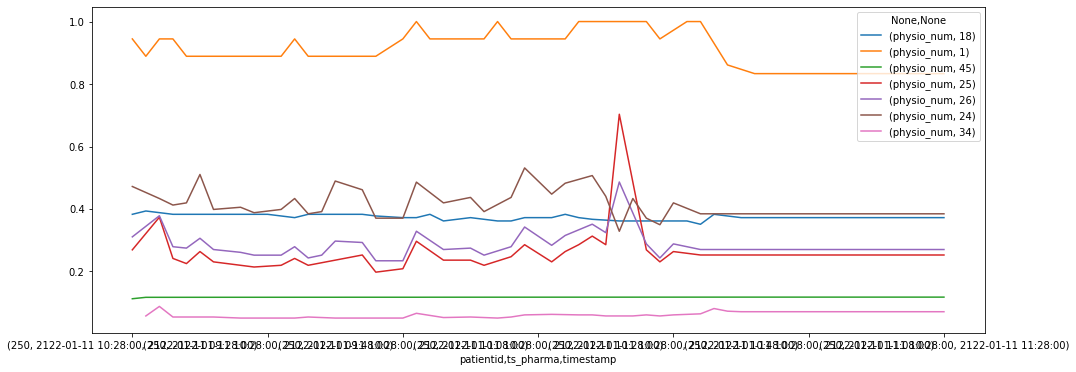

In [25]:
data.interpolate(method='linear').plot(figsize=(16,6))

<AxesSubplot:xlabel='patientid,ts_pharma,timestamp'>

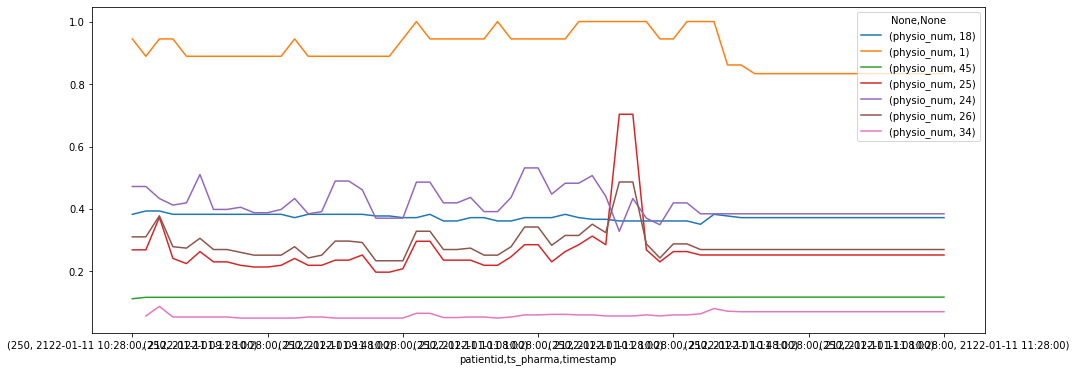

In [163]:
data.fillna(method='ffill').plot(figsize=(16,6))

In [164]:
# 18 - HR
# 24 - BPs
# 34 - CVP

hr_107 = df_107_physio.loc[:, ('physio_num', '18')].fillna(method='ffill').groupby(level=[0,1]).apply(list)
bps_107 = df_107_physio.loc[:, ('physio_num', '24')].fillna(method='ffill').groupby(level=[0,1]).apply(list)
cvp_107 = df_107_physio.loc[:, ('physio_num', '34')].fillna(method='ffill').groupby(level=[0,1]).apply(list)

In [165]:
hr_107.shape, len(hr_107)

((6029,), 6029)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 6029/6029 [00:03<00:00, 1750.13it/s]


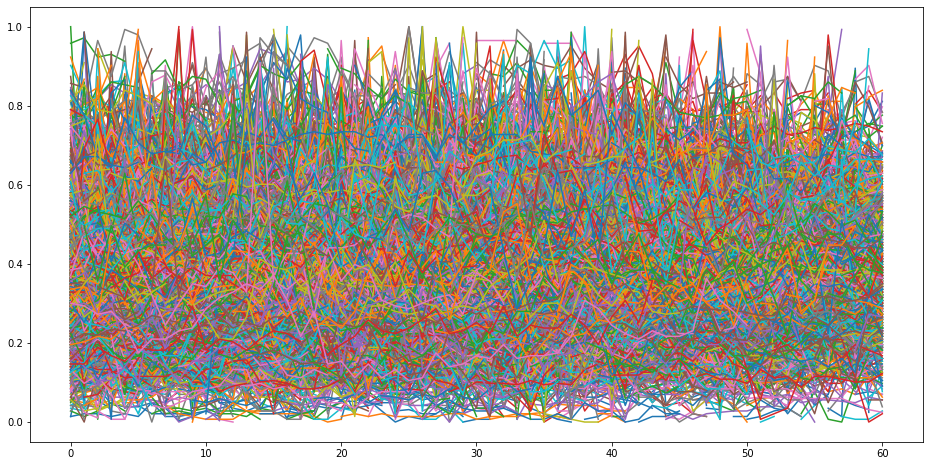

In [36]:
fig = plt.figure(figsize=(16, 8))

for i in tqdm(range(len(bps_107))):
    plt.plot(bps_107.iloc[i])

# PCA Clustering of BPs for pharma 107 samples

In [181]:
patient_info_107 = patient_info[patient_info['patientid'].isin(bps_107.index.get_level_values(0).unique())]

mask_mortality = patient_info_107['discharge_status']=='dead'
mask_gender = patient_info_107['sex']=='M'
mask_age = patient_info_107['age'] > 75

los = patient_info_107['los']
los.apply(lambda x: x.total_seconds() / 3600 / 24)                # in days
mask_los = patient_info_107['los'] > np.percentile(los, 90)
mask_los1 = patient_info_107['los'] < np.percentile(los, 25)
mask_los2 = (patient_info_107['los'] > np.percentile(los, 25)) & (patient_info_107['los'] < np.percentile(los, 50))
mask_los3 = (patient_info_107['los'] > np.percentile(los, 50)) & (patient_info_107['los'] < np.percentile(los, 75))
mask_los4 = patient_info_107['los'] > np.percentile(los, 75)

In [172]:
from sklearn.decomposition import PCA

(6029, 60)

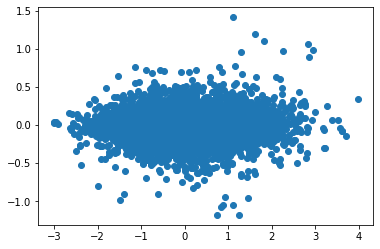

In [183]:
bps_array = np.vstack(bps_107.values)
pca = PCA(n_components='mle')
pca.fit(bps_array)

bps_mle = pca.transform(bps_array)
plt.scatter(bps_mle[:,0], bps_mle[:,2])
bps_mle.shape

Text(0.5, 1.0, 'BPs - gender pivot')

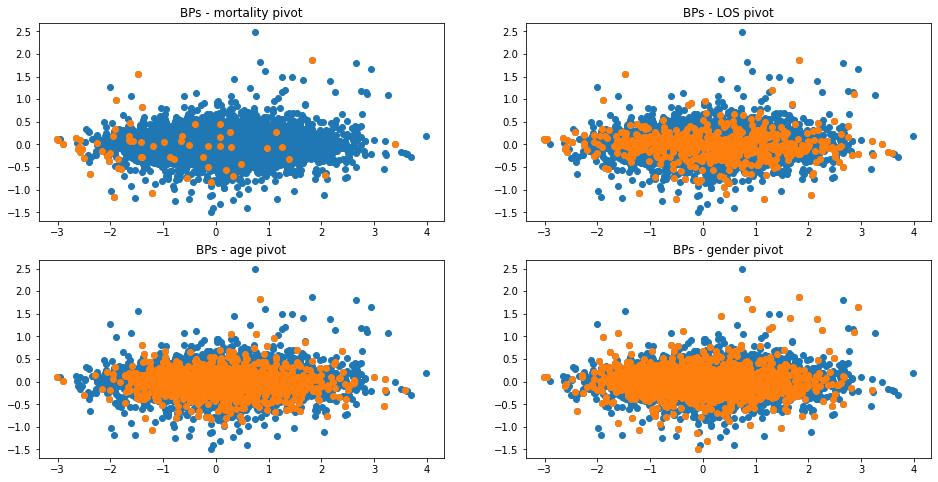

In [182]:
fig, ax = plt.subplots(2, 2, figsize=(16,8))

ax[0][0].scatter(bps_mle[:,0], bps_mle[:,1])
ax[0][0].scatter(bps_mle[mask_mortality][:,0], bps_mle[mask_mortality][:,1])
ax[0][0].set_title(f"BPs - mortality pivot")

ax[0][1].scatter(bps_mle[:,0], bps_mle[:,1])
ax[0][1].scatter(bps_mle[mask_los][:,0], bps_mle[mask_los][:,1])
ax[0][1].set_title(f"BPs - LOS pivot")

ax[1][0].scatter(bps_mle[:,0], bps_mle[:,1])
ax[1][0].scatter(bps_mle[mask_age][:,0], bps_mle[mask_age][:,1])
ax[1][0].set_title(f"BPs - age pivot")

ax[1][1].scatter(bps_mle[:,0], bps_mle[:,1])
ax[1][1].scatter(bps_mle[~mask_gender][:,0], bps_mle[~mask_gender][:,1])
ax[1][1].set_title(f"BPs - gender pivot")

Text(0.5, 1.0, 'Patient 3 - Pharma 107: Liquemin 5000 U/ml ')

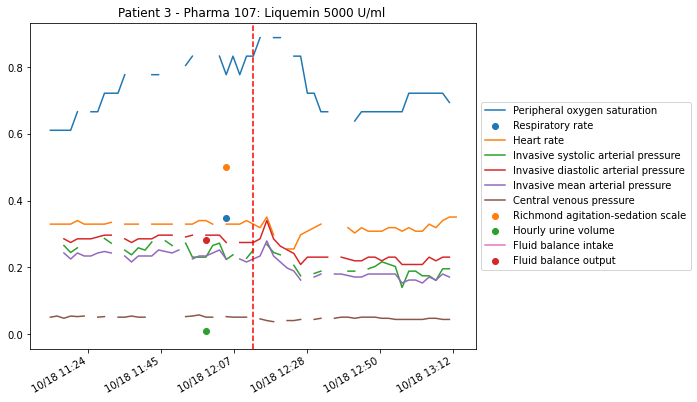

In [78]:
pharmaid = 107
save_path = f'../plots/pharma_response/{pharmaid}/'
Path(save_path).mkdir(parents=True, exist_ok=True)

pid_107 = df_107.index.get_level_values(0).unique()

pid = pid_107[1]
data = df_107.loc[pid]


import matplotlib.dates as mdates
xformatter = mdates.DateFormatter('%m/%d %H:%M')

pharma_name = selected_pharma.loc[selected_pharma['variableid']==pharmaid, 'variablename'].iloc[0]
fig, ax = plt.subplots(1,1,figsize=(8,6))
for _, uid in data.columns:
    label = selected_physio.loc[selected_physio['uid']==int(uid), 'variablename'].unique().item()
    values = data[('physio_num', uid)]
    values.index = values.index.droplevel(0)

    if (~pd.isnull(values)).sum() > 0:
        if (~pd.isnull(values)).sum() == 1:
            ax.scatter(values.index, values.values, label=label)
        else:
            ax.plot(values, label=label)

plt.axvline(x = values.index[len(values.index)//2], color = 'r', linestyle='--')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=30, ha='right')
# ax.xaxis.set_major_locator(plt.MaxNLocator(9))
ax.xaxis.set_major_formatter(xformatter)
ax.set_title(f'Patient {pid} - Pharma {pharmaid}: {pharma_name} ')

In [159]:
pid_107 = df_107.index.get_level_values(0).unique()


pid = pid_107[1]
data = df_107.loc[pid]
data.index = data.index.droplevel(0)
data = data.dropna(axis=1, how='all')



,1,2,18,24,25,26,34,42,43,45,46
timestamp,,,,,,,,,,,
2163-10-18 11:13:00,93.0,NaN,77.0,99.0,57.0,71.5,12.0,NaN,NaN,5321.038000,NaN
2163-10-18 11:15:00,93.0,NaN,77.0,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2163-10-18 11:17:00,93.0,NaN,77.0,100.0,57.0,72.0,11.0,NaN,NaN,NaN,NaN
2163-10-18 11:19:00,93.0,NaN,77.0,97.0,56.0,70.0,13.0,NaN,NaN,NaN,NaN
2163-10-18 11:21:00,94.0,NaN,78.0,99.0,57.0,72.0,12.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2163-10-18 13:05:00,95.0,NaN,77.0,87.0,52.0,64.0,11.0,NaN,NaN,NaN,NaN
2163-10-18 13:07:00,95.0,NaN,76.0,85.0,51.0,63.0,11.0,NaN,NaN,NaN,NaN
2163-10-18 13:09:00,95.0,NaN,78.0,90.0,52.0,65.0,10.0,NaN,NaN,NaN,NaN


In [4]:
patient_data = pickle.load(open('../processed/patient_data_selected.p', 'rb'))
../processed-v2/data_per_patient_resample2min/SurgicalCardiovascular/1.csv

In [5]:
# all patient with / without selected pharama
pid_group_all = pickle.load(open('../processed/pid_apache_group.p', 'rb'))
pid_all_ = []
for apache in pid_group_all:
    print(f'{apache}:\t{len(pid_group_all[apache])}')
    pid_all_ += list(pid_group_all[apache])
    
len(pid_all_), len(set(pid_all_)) 

Cardiovascular:	5042
Pulmonary:	2823
Gastrointestinal:	3869
Neurological:	6231
Sepsis:	665
Trauma:	1693
Metabolic/Endocrinology:	681
Hematology:	108
Other:	726
Surgical Cardiovascular:	8748
Surgical Respiratory:	761
Surgical Gastrointestinal:	1982
Surgical Neurological:	4691
Surgical Trauma:	488
Surgical Urogenital:	108
Surgical Gynecology:	83
Surgical Orthopedics:	227
Urogenital:	111
Surgical others:	356
Intoxication:	69


(39462, 33716)

In [6]:
# patient with selected pharma
pid_all = []
for apache in pid_group:
    print(f'{apache}:\t{len(pid_group[apache])}')
    pid_all += pid_group[apache]
    
len(pid_all), len(set(pid_all))      # a patient can have multiple APACHE categories

Cardiovascular:	4941
Pulmonary:	2671
Gastrointestinal:	3245
Neurological:	5468
Sepsis:	649
Trauma:	1546
Metabolic/Endocrinology:	624
Hematology:	106
Other:	642
Surgical Cardiovascular:	8655
Surgical Respiratory:	648
Surgical Gastrointestinal:	1710
Surgical Neurological:	3390
Surgical Trauma:	451
Surgical Urogenital:	92
Surgical Gynecology:	77
Surgical Orthopedics:	214
Urogenital:	98
Surgical others:	301
Intoxication:	64


(35592, 30717)

# Length of stay

In [7]:
patient_info_selected = patient_info[patient_info['patientid'].isin(set(pid_all))]
patient_info_selected.shape

(30717, 6)

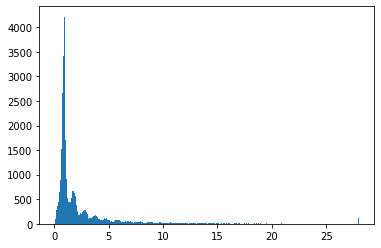

In [8]:
los = patient_info_selected['los'].values
los_in_day = [l.days + l.seconds/3600/24 for l in los]

counts, bins, _ = plt.hist(los_in_day, bins=300);

In [9]:
for q in np.linspace(0.1, 0.9, 9):
    print(f'Quantile {q:.1}: \t{np.quantile(los_in_day, q)}')

Quantile 0.1: 	0.6336527777777778
Quantile 0.2: 	0.764587962962963
Quantile 0.3: 	0.8590277777777778
Quantile 0.4: 	0.9236111111111112
Quantile 0.5: 	1.0131944444444445
Quantile 0.6: 	1.4201388888888888
Quantile 0.7: 	1.9116319444444445
Quantile 0.8: 	2.9513472222222226
Quantile 0.9: 	5.624305555555556


# Pharma statistics

In [10]:
stat_pharma_sorted = dict(sorted(stat_pharma.items(), key=lambda item: len(item[1]['pid']), reverse=True))
df_stat_pharma = pd.DataFrame(columns=['pharma', '#patient', '#event'])
for i, pharma in enumerate(stat_pharma_sorted):
    pharma_name = selected_pharma[selected_pharma['variable_id']==pharma]['variable_name'].item()
    row = {
        'pharma': pharma_name, 
        '#patient':len(stat_pharma_sorted[pharma]["pid"]), 
        '#event':stat_pharma_sorted[pharma]["count"]
    }
    df_stat_pharma.loc[i] = row

In [11]:
display(HTML(df_stat_pharma.to_html()))

,pharma,#patient,#event
0,Disoprivan 2%,17702,2168479
1,Magnesium Sulfat 50% 10 ml,16116,64229
2,Disoprivan 2% BOLUS,12668,126558
3,Noradrenalin 20 µg/ml Perfusor,9221,736393
4,Lasix Bolus 20mg Amp.,8755,51336
5,Dormicum inj 1 mg/ml,7841,120038
6,Intravenous blood transfusion of packed cells,7810,43065
7,Insulin Actrapid inj 100 U/ml,6664,1142173
8,Kalium Chlorid 15% 10 ml,6541,230871
9,Ebrantil Inj Lsg,6283,82059


# Physio statistics

data entry: status\
1=out of range\
2=invalidated\
4=first of connection\
8=caused by event\
16=compressed\
32=notified, not measured\
64=is bigger than\
128=is smaller than\
1024=mandatory

In [12]:
physio_list = patient_data['variableid'].unique().tolist()
len(physio_list)

73

In [13]:
def percentile(n):
    def percentile_(x):
        return np.nanpercentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [14]:
# # Physio statistics for all patient
# gb_physioid = patient_data.groupby(['variableid']).agg({'value': ['mean', 'median', 'min', 'max',
#                                                                   percentile(0.1),
#                                                                   percentile(1), percentile(5),
#                                                                   percentile(95), percentile(99),
#                                                                   percentile(99.9)]})
# display(HTML(gb_physioid.to_html()))

In [15]:
# # Physio features for individual patients
# gb_pid_physioid = patient_data.groupby(['patientid', 'variableid']).agg({'value': ['mean', 'median', 'min', 'max',
#                                                                   percentile(0.1),
#                                                                   percentile(1), percentile(5),
#                                                                   percentile(95), percentile(99),
#                                                                   percentile(99.9)]})

In [16]:
# pickle.dump(gb_physioid, open('../processed/physio_groupby_physioid.p', 'wb'))
# pickle.dump(gb_pid_physioid, open('../processed/physio_groupby_pid_physioid.p', 'wb'))

gb_physioid = pickle.load(open('../processed/physio_groupby_physioid.p', 'rb'))
gb_pid_physioid = pickle.load(open('../processed/physio_groupby_pid_physioid.p', 'rb'))

In [17]:
gb_pid_physioid.loc[[1]]

value                                        \
                             mean       median         min          max   
patientid variableid                                                      
1         200           89.655174    89.000000   78.000000   106.000000   
          300           19.159639    19.000000    9.500000    31.000000   
          310           14.425949    16.950001    0.000000    26.799999   
          320           15.357142    15.000000   13.000000    17.000000   
          2010          47.122150    40.349998   34.799999    99.900002   
          2400         500.000000   500.000000  450.000000   550.000000   
          2410         607.873413   560.500000  144.000000  1114.000000   
          2600           6.869565     8.000000    5.000000     8.000000   
          2610           6.579114     7.400000    4.300000     8.400000   
          3000          11.017721    11.400000    7.200000    16.700001   
          3110          24.036709    22.600000   15.200000    38.200001   
          3200          16.764198    16.700001    8.500000    21.700001   
          3845           1.675000     1.000000    1.000000     8.000000   
          4000          99.594711   100.000000   79.000000   100.000000   
          10000100       4.600000     5.000000    4.000000     5.000000   
          10000200       6.000000     6.000000    6.000000     6.000000   
          10000300       3.600000     4.000000    3.000000     4.000000   
          15001166       1.454545     1.000000    1.000000     6.000000   
          15001525       2.000000     2.000000    2.000000     2.000000   
          15001552       1.000000     1.000000    1.000000     1.000000   
          15001565      -1.428571    -1.000000   -5.000000     0.000000   
          20000200     161.333328   163.000000  123.000000   196.000000   
          20000300       7.348166     7.345000    7.308000     7.426000   
          20000400     138.166672   138.000000  136.000000   140.000000   
          20000500       4.516667     4.500000    4.300000     4.900000   
          20000600     106.000000   106.000000  106.000000   106.000000   
          20000700       7.014286     7.900000    4.800000     7.900000   
          20001200      40.666668    38.000000   37.000000    47.000000   
          20001300      -3.200000    -3.450000   -4.700000     0.000000   
          20002200      48.000000    48.000000   48.000000    48.000000   
          20004100       6.100000     6.100000    6.100000     6.100000   
          20004200      21.633333    21.650002   19.900000    23.600000   
          24000210     337.500000   337.500000  323.000000   352.000000   
          24000220      12.900000    12.900000   10.900000    14.900000   
          24000521     108.500000   109.000000  107.000000   109.000000   
          24000522       1.270000     1.260000    1.210000     1.320000   
          24000524       1.316667     1.150000    1.000000     1.800000   
          24000526       1.300000     1.300000    1.200000     1.400000   
          24000548      98.500000    97.500000   97.000000   101.000000   
          24000549       1.516667     1.500000    1.300000     1.800000   
          24000806     177.000000   177.000000  167.000000   187.000000   
          30005010    2012.257812  1722.040161    0.000000  3594.562988   
          30005110    1186.417480  1211.416260  225.320892  1999.557251   

                                                                             \
                     percentile_0.1 percentile_1 percentile_5 percentile_95   
patientid variableid                                                          
1         200             78.463000    80.000000    82.150000     99.000000   
          300              9.747500    11.195000    12.025000     25.600000   
          310              0.000000     0.000000     0.000000     25.130000   
          320             13.000000    13.000000    13.000000     17.000000   
          2010          

In [98]:
data_na = patient_data[patient_data['value'].isna()]
data_na

,datetime,entertime,patientid,status,stringvalue,type,value,variableid
454874,2155-04-24 18:43:00,2155-04-24 20:23:37.930,2470,40,< 0.1,F,NaN,24000570
731148,2158-02-20 16:00:00,2158-02-20 16:28:55.343,7880,40,< 3,F,NaN,20002200
731149,2158-02-20 16:00:00,2158-02-21 01:48:07.186,7880,40,< 3,F,NaN,20002200
861298,2131-02-18 11:54:00,2131-02-18 11:57:30.460,9555,40,!folgt,F,NaN,20000300
861301,2131-02-18 11:54:00,2131-02-18 11:57:30.320,9555,40,!folgt,F,NaN,20000200
...,...,...,...,...,...,...,...,...
774080279,2125-12-28 04:12:00,2125-12-29 00:26:15.106,3710,40,< 0.1,F,NaN,24000570
774762252,2176-11-26 06:00:00,2176-11-26 07:30:45.730,11803,40,< 3,F,NaN,20002200
776319076,2187-11-14 19:13:00,2187-11-14 19:59:39.530,23635,40,!folgt,F,NaN,24000572
776319077,2187-11-14 19:13:00,2187-11-14 20:04:39.706,23635,40,< 10,F,NaN,20003200


In [100]:
physio_na = selected_physio[selected_physio['variable_id'].isin(data_na['variableid'].unique())]
physio_na

,variable_id,variable_name,category
25,24000806,Troponin T.cardiac [Mass/volume] in Serum or P...,Cardiac markers
26,24000210,Creatine kinase panel - Serum or Plasma,Cardiac markers
27,24000220,Creatine kinase.MB [Mass/volume] in Serum or P...,Cardiac markers
28,24000569,Natriuretic peptide.B prohormone N-Terminal [M...,Cardiac markers
40,20001300,Base excess in Arterial blood by calculation,Acid-Base balance
41,24000526,Carboxyhemoglobin/Hemoglobin.total in Arterial...,Acid-Base balance
42,24000548,Hemoglobin [Mass/volume] in Arterial blood,Acid-Base balance
43,20004200,Bicarbonate [Moles/volume] in Arterial blood,Acid-Base balance
45,24000549,Methemoglobin/Hemoglobin.total in Arterial blood,Acid-Base balance
46,20000300,pH of Arterial blood,Acid-Base balance


In [102]:
data_na[data_na['variableid'].isin(physio_na[physio_na['category']=='Renal']['variable_id'])]

,datetime,entertime,patientid,status,stringvalue,type,value,variableid
6884366,2121-04-01 11:06:00,2121-04-01 11:15:30.010,29595,8,4.2 mmol/L,F,NaN,24000867
6884379,2121-04-01 11:06:00,2121-04-01 11:15:30.010,29595,8,138 mmol/L,F,NaN,24000866
6885669,2121-04-01 13:30:00,2121-04-01 13:40:01.586,29595,8,136 mmol/L,F,NaN,24000866
6885670,2121-04-01 13:30:00,2121-04-01 13:40:01.570,29595,8,4.3 mmol/L,F,NaN,24000867
6893907,2121-04-02 05:42:00,2121-04-02 05:46:53.390,29595,8,139 mmol/L,F,NaN,24000866
...,...,...,...,...,...,...,...,...
770910532,2173-06-02 19:37:00,2173-06-02 20:27:47.840,26655,8,102.7 mmol/L,F,NaN,24000754
771545752,2162-11-03 13:32:00,2162-11-03 14:24:15.376,2472,40,< 10,F,NaN,20003200
771545753,2162-11-03 13:32:00,2162-11-04 01:23:19.986,2472,40,< 10,F,NaN,20003200
776319076,2187-11-14 19:13:00,2187-11-14 19:59:39.530,23635,40,!folgt,F,NaN,24000572


In [111]:
data_na[data_na['variableid'].isin(physio_na[physio_na['category']=='Cardiac markers']['variable_id'])]

,datetime,entertime,patientid,status,stringvalue,type,value,variableid
1507329,2109-01-04 06:00:00,2109-01-04 07:40:55.610,15838,40,< 0.003,F,NaN,24000806
1507330,2109-01-04 06:00:00,2109-01-05 00:40:06.866,15838,40,< 0.003,F,NaN,24000806
2892372,2167-03-09 11:26:00,2167-03-09 12:32:23.600,28625,40,< 0.003,F,NaN,24000806
2892373,2167-03-09 11:26:00,2167-03-09 12:38:25.676,28625,40,< 0.003,F,NaN,24000806
9415507,2122-08-20 14:37:00,2122-08-20 15:56:38.690,21273,40,< 0.3,F,NaN,24000220
...,...,...,...,...,...,...,...,...
750498379,2191-03-02 22:21:00,2191-03-02 23:13:42.216,25568,9,0.004 µg/L,F,NaN,24000806
756887783,2122-07-17 14:00:00,2122-07-18 01:34:04.900,33541,40,< 5,F,NaN,24000569
756887784,2122-07-17 14:00:00,2122-07-17 14:46:03.736,33541,40,< 5,F,NaN,24000569
763571882,2145-06-01 05:45:00,2145-06-01 07:36:37.523,7769,40,< 0.003,F,NaN,24000806


In [121]:
data_na[data_na['variableid'].isin(physio_na[physio_na['category']=='Cardiac markers']['variable_id'])]['status'].unique()

array([40,  9, 72], dtype=int16)

In [122]:
data_na[data_na['variableid'].isin(physio_na[physio_na['category']=='Cardiac markers']['variable_id'])]['stringvalue'].unique()

array(['< 0.003', '< 0.3', '0.114 µg/L', '0.095 µg/L', '0.035 µg/L',
       '0.048 µg/L', '0.013 µg/L', '0.022 µg/L', '< 7', '< 5',
       '0.050 µg/L', '< 3 ng/L', '0.047 µg/L', '< 0.7', '1.240 µg/L',
       '1.450 µg/L', '0.401 µg/L', '0.251 µg/L', '< 0.003 µg/L',
       '0.087 µg/L', '0.073 µg/L', '0.320 µg/L', '0.166 µg/L',
       '0.011 µg/L', '!folgt', '0.024 µg/L', '0.816 µg/L', '1.010 µg/L',
       '1.100 µg/L', '1.120 µg/L', '0.538 µg/L', '0.359 µg/L',
       '0.006 µg/L', '0.943 µg/L', '1.060 µg/L', '0.930 µg/L',
       '0.377 µg/L', '< 0.3 µg/L', '0.054 µg/L', '0.902 µg/L',
       '0.837 µg/L', '0.420 µg/L', '0.260 µg/L', '0.053 µg/L',
       '1.910 µg/L', '2.520 µg/L', '2.250 µg/L', '0.020 µg/L',
       '0.062 µg/L', '0.012 µg/L', '0.247 µg/L', '0.384 µg/L',
       '0.255 µg/L', '0.065 µg/L', '0.064 µg/L', '0.075 µg/L',
       '0.070 µg/L', '0.222 µg/L', '0.120 µg/L', '0.127 µg/L',
       '0.183 µg/L', '0.157 µg/L', '0.168 µg/L', '0.197 µg/L',
       '0.232 µg/L', '0.351 µg

In [106]:
data_na[data_na['variableid'].isin(physio_na[physio_na['category']=='Renal']['variable_id'])]['type'].unique()

array(['F', 'D'], dtype=object)

In [112]:
data_na[data_na['variableid'].isin(physio_na[physio_na['category']=='Renal']['variable_id'])]['status'].unique()

array([  8,  40,   9,  72,  42, 136], dtype=int16)

In [110]:
data_na.loc[(data_na['variableid'].isin(physio_na[physio_na['category']=='Renal']['variable_id'])) 
            & (data_na['type']=='D')]

,datetime,entertime,patientid,status,stringvalue,type,value,variableid
185348033,2169-04-02 03:00:00,2169-04-02 03:04:59.373,2996,42,!folgt,D,NaN,24000522
185348034,2169-04-02 03:00:00,2169-04-02 03:04:59.403,2996,42,!folgt,D,NaN,24000521
185349190,2169-04-02 06:17:00,2169-04-02 06:22:57.560,2996,42,!folgt,D,NaN,24000521
185349203,2169-04-02 06:17:00,2169-04-02 06:22:58.310,2996,42,!folgt,D,NaN,24000522
185351222,2169-04-02 12:29:00,2169-04-02 12:33:29.633,2996,42,!folgt,D,NaN,24000521
...,...,...,...,...,...,...,...,...
752841860,2156-06-14 12:10:00,2156-06-14 12:14:54.283,23622,42,!folgt,D,NaN,24000521
752845154,2156-06-14 23:56:00,2156-06-15 00:01:44.520,23622,42,!folgt,D,NaN,24000521
752845155,2156-06-14 23:56:00,2156-06-15 00:01:44.393,23622,42,!folgt,D,NaN,24000522
752846653,2156-06-15 06:05:00,2156-06-15 06:11:59.820,23622,42,!folgt,D,NaN,24000521


In [ ]:
patient_data[patient_data['variableid']==24000521].iloc[:30]

In [125]:
data_na[data_na['variableid'].isin(physio_na[physio_na['category']=='Renal']['variable_id'])]['stringvalue'].unique()

array(['4.2 mmol/L', '138 mmol/L', '136 mmol/L', '4.3 mmol/L',
       '139 mmol/L', '3.1 mmol/L', '143 mmol/L', '3.7 mmol/L', '< 10',
       '< 0.8', '16954 µmol/L', '19856 µmol/L', '7836 µmol/L', '!folgt',
       '1621 µmol/L', '3018 µmol/L', '3.8 mmol/L', '4.5 mmol/L',
       '4.0 mmol/L', '4.6 mmol/L', '137 mmol/L', '4.9 mmol/L',
       '142 mmol/L', '4.7 mmol/L', '6242 µmol/L', '16 mmol/L',
       '9803 µmol/L', '336.6 mmol/L', '114 mmol/L', '4.1 mmol/L',
       '14 mmol/L', '9261 µmol/L', '233.2 mmol/L', '5859 µmol/L',
       '415.3 mmol/L', '7559 µmol/L', '250.8 mmol/L', '20253 µmol/L',
       '141 mmol/L', '135 mmol/L', '5.3 mmol/L', '134 mmol/L',
       '< 10 mmol/L', '11125 µmol/L', '187.9 mmol/L', '2096 µmol/L',
       '1744 µmol/L', '10234 µmol/L', '154.8 mmol/L', '3.6 mmol/L',
       '9256 µmol/L', '176.4 mmol/L', '10536 µmol/L', '3.5 mmol/L',
       '232.4 mmol/L', '3007 µmol/L', '10693 µmol/L', '86.4 mmol/L',
       '5.7 mmol/L', '< 1.0', '396.1 mmol/L', '7005 µmol/L',
  

In [113]:
data_na[data_na['variableid'].isin(physio_na[physio_na['category']=='Acid-Base balance']['variable_id'])]

,datetime,entertime,patientid,status,stringvalue,type,value,variableid
861298,2131-02-18 11:54:00,2131-02-18 11:57:30.460,9555,40,!folgt,F,NaN,20000300
861301,2131-02-18 11:54:00,2131-02-18 11:57:30.320,9555,40,!folgt,F,NaN,20000200
861312,2131-02-18 11:54:00,2131-02-18 11:57:30.163,9555,40,!folgt,F,NaN,24000526
1819462,2193-01-02 16:55:00,2193-01-03 01:05:30.433,17786,40,35.mmol/L,F,NaN,20004200
4724453,2183-04-21 16:43:00,2183-04-22 11:26:18.750,8814,9,193 mm Hg,F,NaN,20000200
...,...,...,...,...,...,...,...,...
741677163,2197-02-15 06:06:00,2197-02-15 06:12:29.340,30429,136,33 mm Hg,F,NaN,20001200
741677168,2197-02-15 06:06:00,2197-02-15 06:12:29.276,30429,72,106 mm Hg,F,NaN,20000200
757113871,2124-05-03 05:31:00,2124-05-03 05:34:41.006,5673,40,!folgt,F,NaN,20000200
757113873,2124-05-03 05:31:00,2124-05-03 05:34:41.083,5673,40,!folgt,F,NaN,20000300


In [114]:
data_na[data_na['variableid'].isin(physio_na[physio_na['category']=='Acid-Base balance']['variable_id'])]['type'].unique()

array(['F', 'P', 'D'], dtype=object)

In [115]:
data_na[data_na['variableid'].isin(physio_na[physio_na['category']=='Acid-Base balance']['variable_id'])]['status'].unique()

array([ 40,   9, 136,  72,  42], dtype=int16)

In [116]:
data_na['status'].unique()

array([ 40,   9,   8,  72, 136,  42,  41], dtype=int16)

In [119]:
patient_data['status'].unique().tolist()

[8, 12, 4, 16, 40, 72, 9, 136, 42, -120, 41, 10]

In [118]:
patient_data['type'].unique()

array(['', 'F', 'P', 'D', 'C'], dtype=object)